In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:

# Paths to CSV files
file1 = './data/benchmark.csv'

# Read the CSV files
df1 = pd.read_csv(file1)

df1['instance_id'] = df1['sample']



In [12]:

# Keep only desired license configurations
license_configs = ['duolingo_super', 'roman_domination']
combined = df1[(df1['license_config'].isin(license_configs)) &
                    (df1['valid'] == True) &
                    (~df1['notes'].isin(['timeout', 'error']))].copy()

# Drop unnecessary columns
combined.drop(columns=['warm_start','image_path','issues'], inplace=True, errors='ignore')
print(f"Filtered dataset shape: {combined.shape}")


Filtered dataset shape: (3508, 27)


In [13]:

sub_duo = combined[combined['license_config'] == 'duolingo_super']
# Order algorithms by ascending mean cost
alg_order = sub_duo.groupby('algorithm')['total_cost'].mean().sort_values().index.tolist()
print('Algorithm order (lowest mean cost first):', alg_order)


Algorithm order (lowest mean cost first): ['ILPSolver', 'AntColonyOptimization', 'TabuSearch', 'GeneticAlgorithm', 'DominatingSetAlgorithm', 'SimulatedAnnealing', 'GreedyAlgorithm', 'RandomizedAlgorithm']


/tmp/ipython-input-1303676659.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=alg_order, showfliers=False)


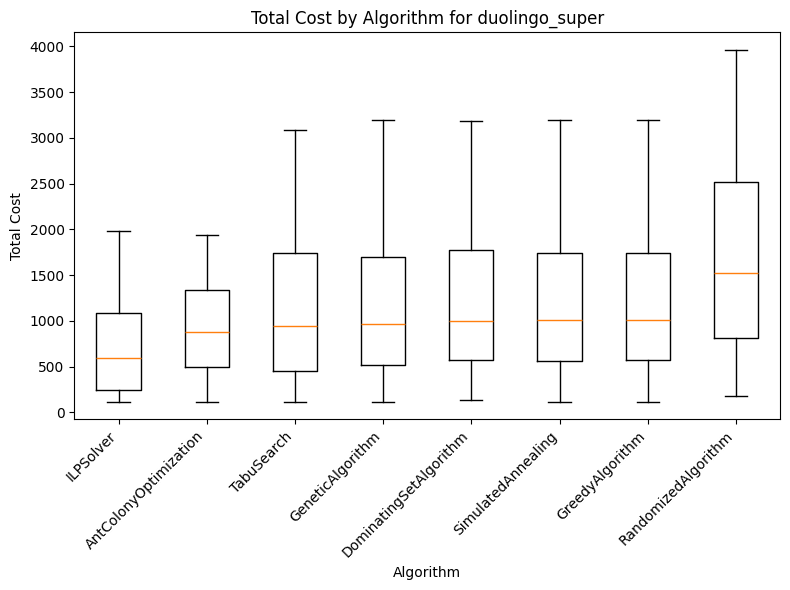

In [ ]:
plt.figure(figsize=(8, 6))
box_data = [sub_duo[sub_duo['algorithm'] == alg]['total_cost'] for alg in alg_order]
plt.boxplot(box_data, labels=alg_order, showfliers=False)
plt.title('Całkowity koszt według algorytmu dla duolingo_super')
plt.ylabel('Całkowity koszt')
plt.xlabel('Algorytm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2039680697.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data_time, labels=alg_order, showfliers=False)


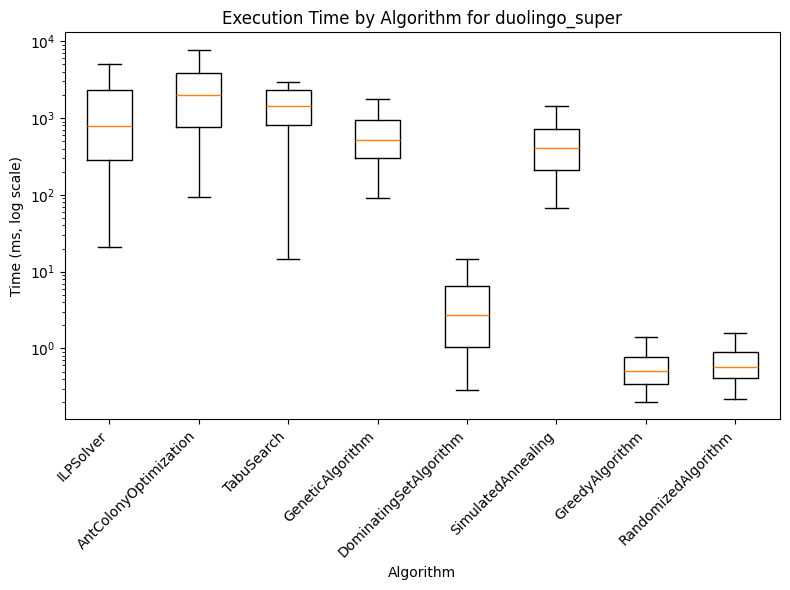

In [ ]:
plt.figure(figsize=(8, 6))
box_data_time = [sub_duo[sub_duo['algorithm'] == alg]['time_ms'] for alg in alg_order]
plt.boxplot(box_data_time, labels=alg_order, showfliers=False)
plt.yscale('log')
plt.title('Czas wykonania według algorytmu dla duolingo_super')
plt.ylabel('Czas (ms, skala log)')
plt.xlabel('Algorytm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

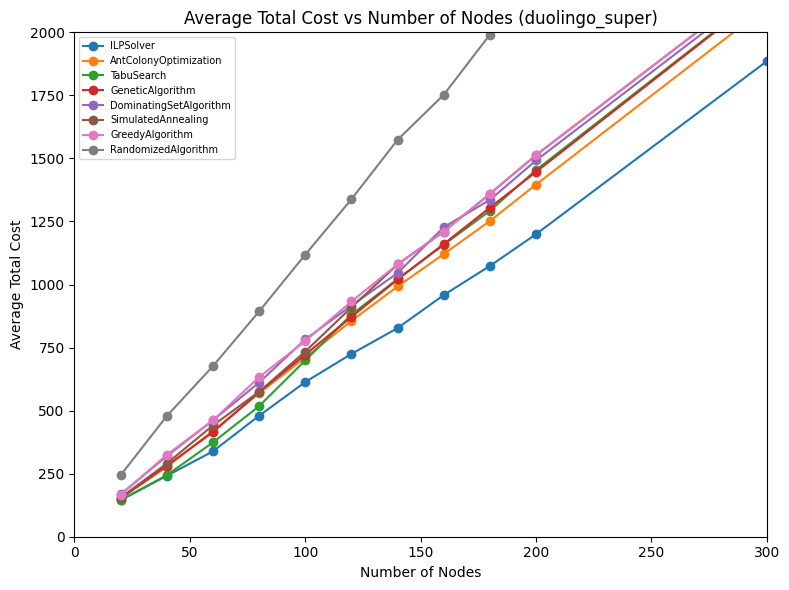

In [ ]:
# Compute mean cost per algorithm per n_nodes
means_cost = sub_duo.groupby(['n_nodes','algorithm'])['total_cost'].mean().reset_index()
plt.figure(figsize=(8, 6))
for alg in alg_order:
    subset = means_cost[means_cost['algorithm'] == alg]
    plt.plot(subset['n_nodes'], subset['total_cost'], marker='o', label=alg)
plt.title('Średni całkowity koszt vs liczba wierzchołków (duolingo_super)')
plt.xlabel('Liczba wierzchołków')
plt.ylabel('Średni całkowity koszt')
plt.ylim(0, 2000)
plt.xlim(0, 300)
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

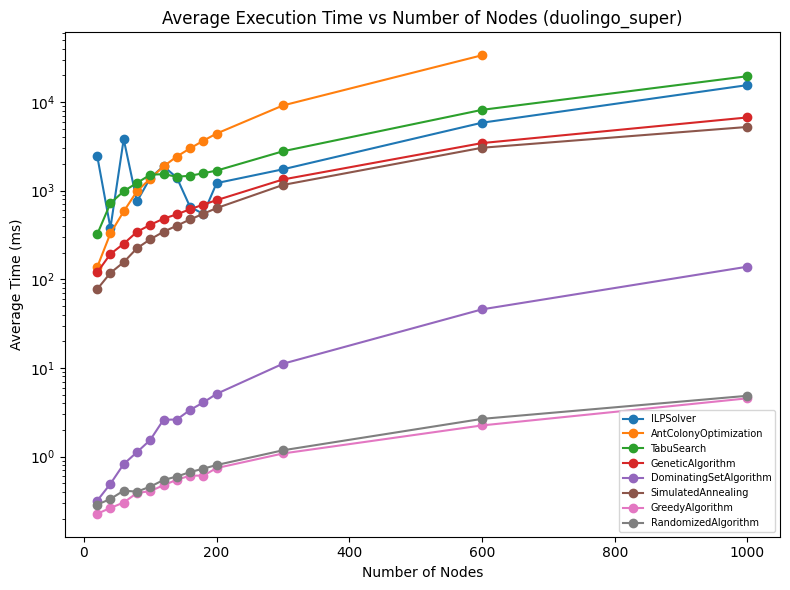

In [ ]:
# Compute mean time per algorithm per n_nodes
means_time = sub_duo.groupby(['n_nodes','algorithm'])['time_ms'].mean().reset_index()
plt.figure(figsize=(8, 6))
for alg in alg_order:
    subset = means_time[means_time['algorithm'] == alg]
    plt.plot(subset['n_nodes'], subset['time_ms'], marker='o', label=alg)
plt.title('Średni czas wykonania vs liczba wierzchołków (duolingo_super)')
plt.xlabel('Liczba wierzchołków')
plt.ylabel('Średni czas (ms)')
plt.yscale('log')
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
for alg in alg_order:
    subset = sub_duo[sub_duo['algorithm'] == alg]
    plt.scatter(subset['time_ms'], subset['total_cost'], s=10, label=alg)
plt.title('Całkowity koszt vs czas wykonania według algorytmu (duolingo_super)')
plt.xlabel('Czas (ms)')
plt.ylabel('Całkowity koszt')
plt.xscale('log')
plt.ylim(0, 2000)
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
box_data_cpn = [sub_duo[sub_duo['algorithm'] == alg]['cost_per_node'] for alg in alg_order]
plt.boxplot(box_data_cpn, labels=alg_order, showfliers=False)
plt.title('Koszt na wierzchołek według algorytmu dla duolingo_super')
plt.ylabel('Koszt na wierzchołek')
plt.xlabel('Algorytm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
for alg in alg_order:
    subset = sub_duo[sub_duo['algorithm'] == alg]
    plt.scatter(subset['n_nodes'], subset['time_ms'], s=10, label=alg)
plt.title('Czas wykonania vs liczba wierzchołków według algorytmu (duolingo_super)')
plt.xlabel('Liczba wierzchołków')
plt.ylabel('Czas (ms)')
plt.yscale('log')
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

In [ ]:
# Correlations of time with number of nodes and with density
corr_results = []
for alg in alg_order:
    subset = sub_duo[sub_duo['algorithm'] == alg]
    corr_n = subset[['n_nodes','time_ms']].corr().iloc[0,1]
    corr_d = subset[['density','time_ms']].corr().iloc[0,1]
    corr_results.append((alg, corr_n, corr_d))

for alg, corr_n, corr_d in corr_results:
    print(f"{alg:25s} korelacja(czas, liczba_wierzchołków) = {corr_n:.3f}, korelacja(czas, gęstość) = {corr_d:.3f}")

In [ ]:

# Create a summary for roman_domination
df_roman = combined[combined['license_config'] == 'roman_domination']
summary_roman = df_roman.groupby('algorithm').agg(
    mean_cost=('total_cost','mean'), mean_time=('time_ms','mean'), count=('total_cost','count')).sort_values('mean_cost')
summary_roman
